# CLUSTERING ANALYSIS 

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
    
Datasets :

Data Preprocessing:

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

3.	Use multiple visualizations to understand the hidden patterns in the dataset

Implementing Clustering Algorithms:

•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
    
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
    
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
    
Visualize the clustering results using scatter plots or other suitable visualization techniques.
    
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
    
Evaluation and Performance Metrics:
    
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1]:
import pandas as pd
df=pd.read_csv("C:\python class basics DS\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing

In [3]:
# Handle missing values
df.fillna(df.mean(), inplace=True)


In [4]:
#Remove outliers in all columns
for column in df.columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0
1,2,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0
2,3,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0
3,4,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0
4,5,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1
3995,4018,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1
3996,4019,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1
3997,4020,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0


In [5]:
#applay standard scalar for above df

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

df_scaled


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-1.734263,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-1.733402,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-1.732540,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,-1.731679,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,1.725958,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,1.726820,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,1.727682,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


# EDA

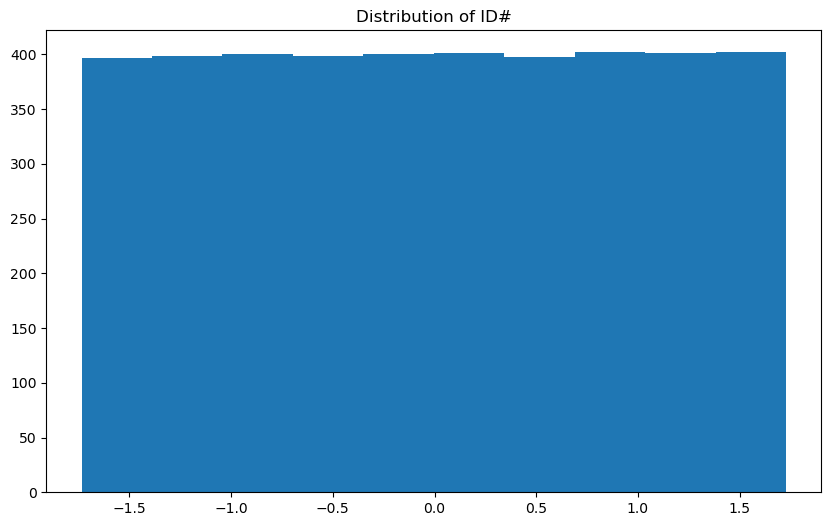

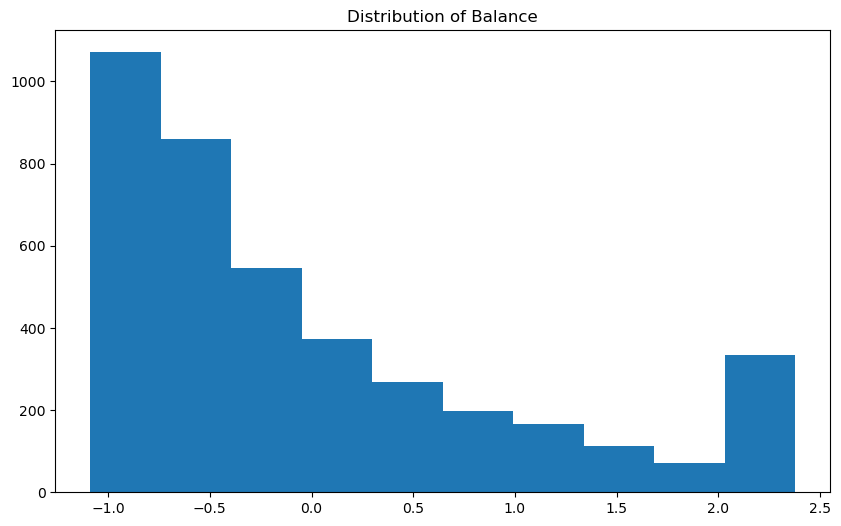

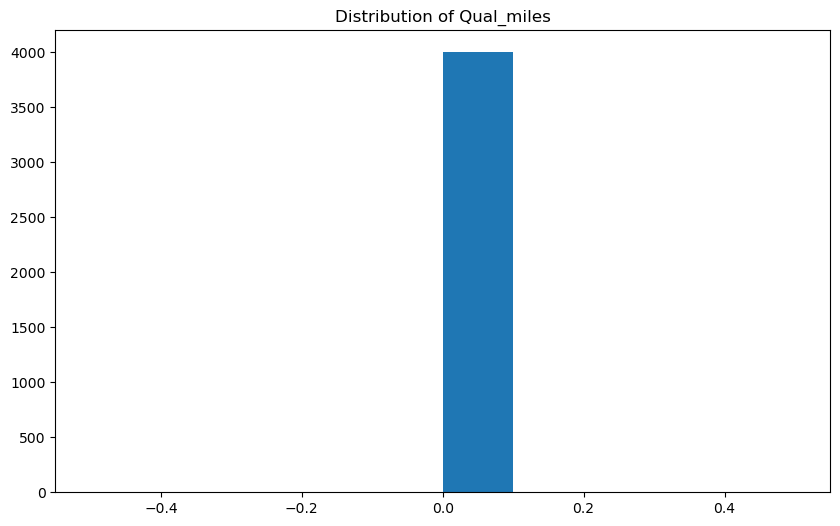

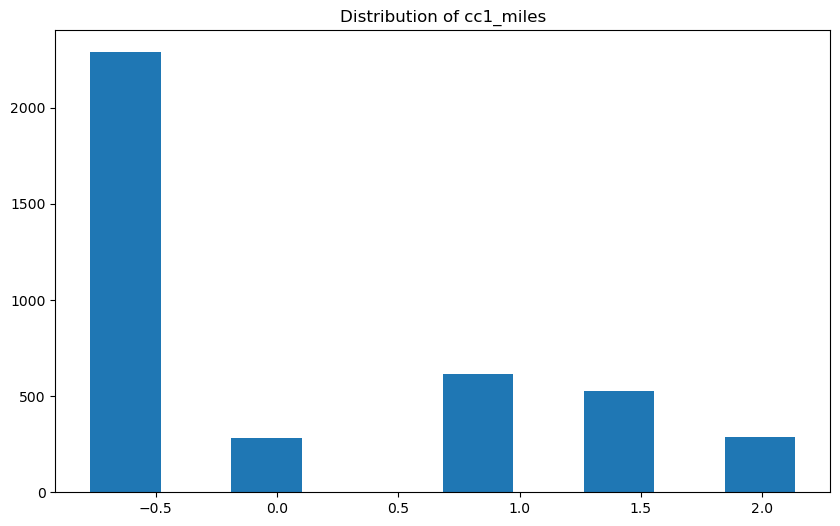

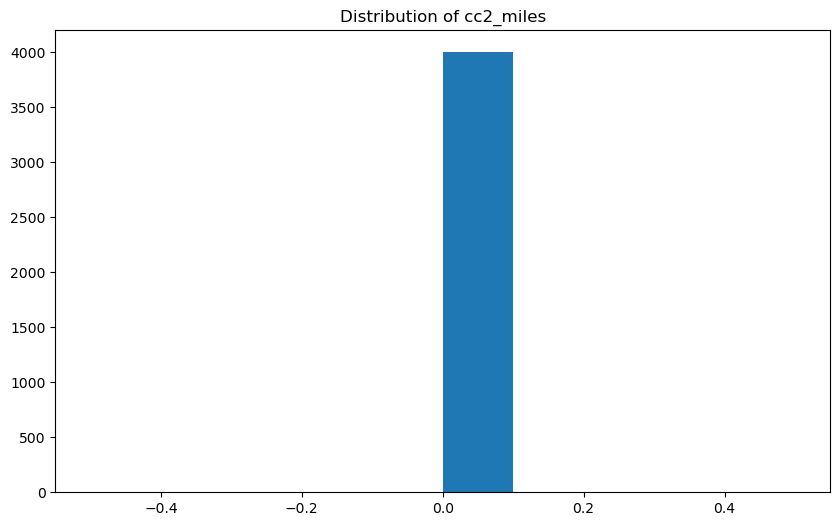

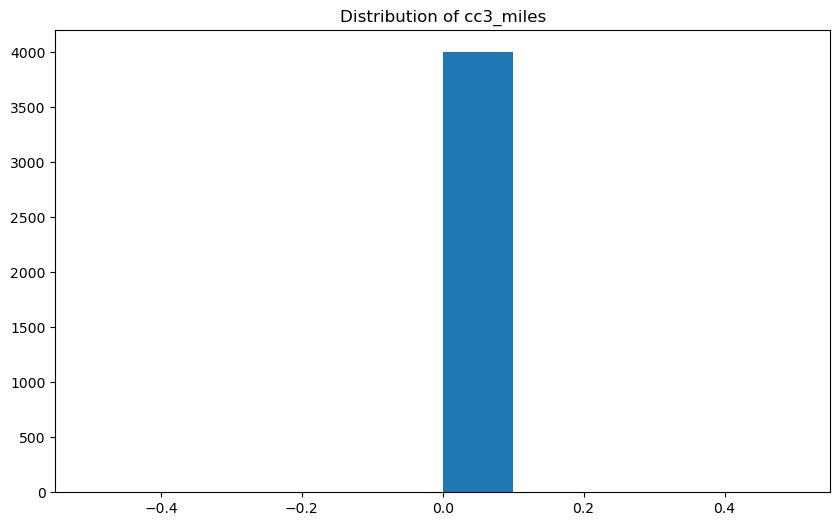

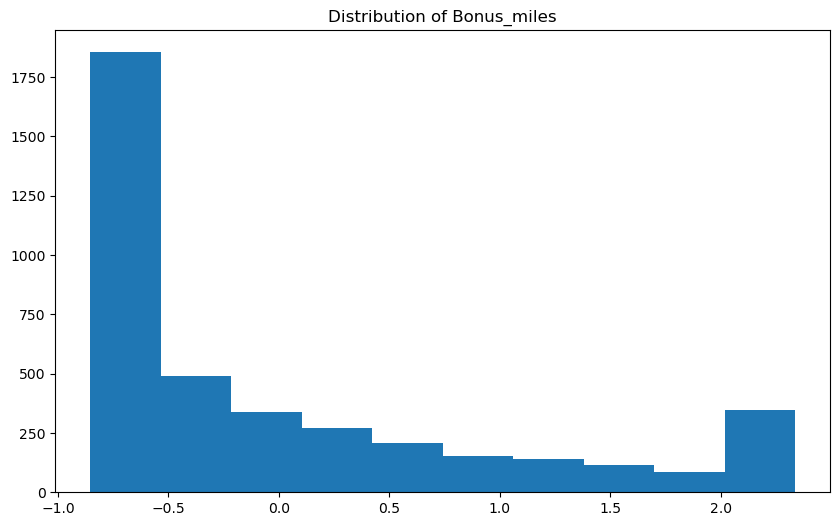

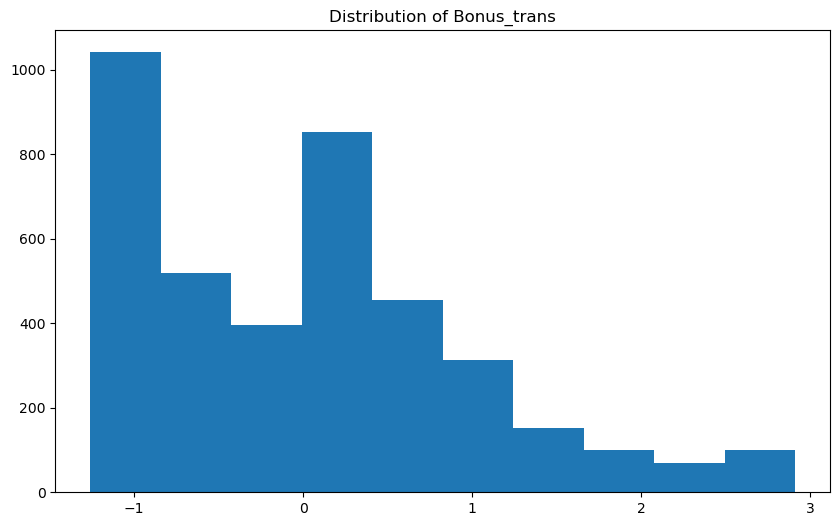

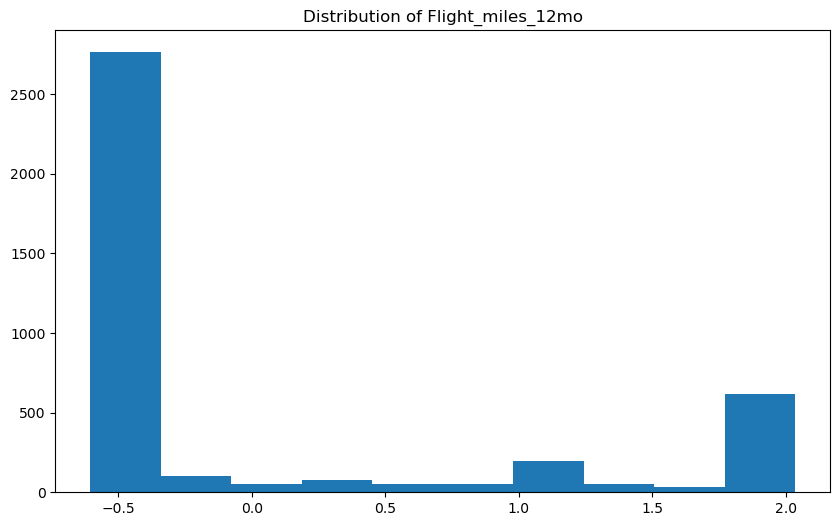

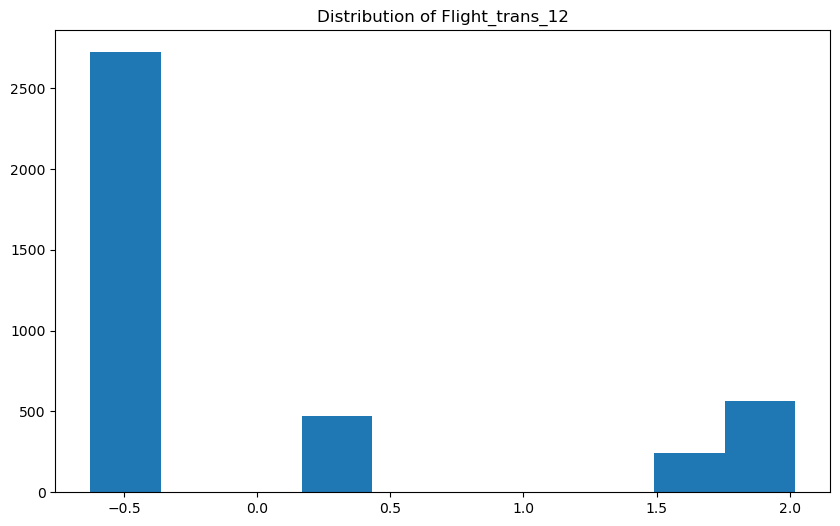

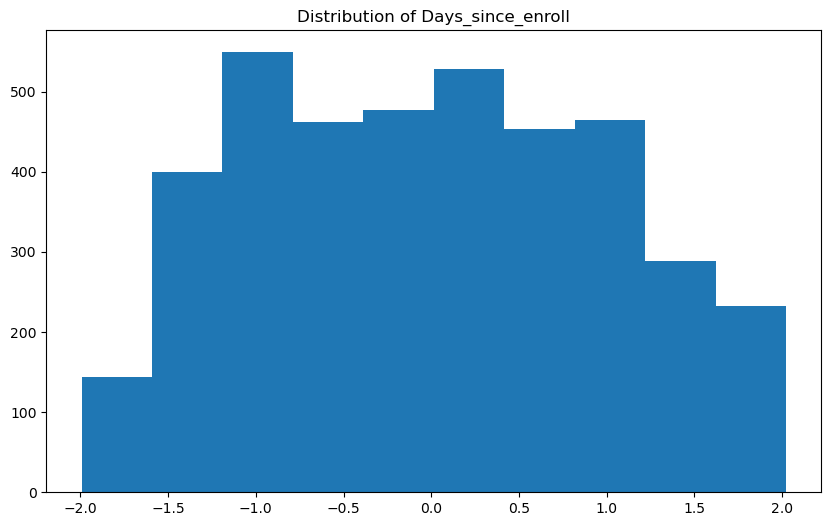

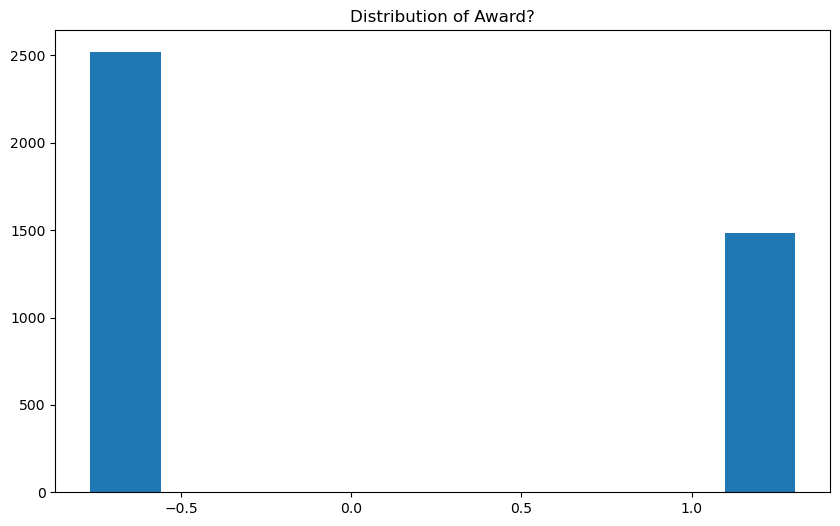

In [6]:
#Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters

import matplotlib.pyplot as plt

# Distribution of each feature
for column in df_scaled.columns:
  plt.figure(figsize=(10, 6))
  plt.hist(df_scaled[column], bins=10)
  plt.title(f"Distribution of {column}")
  plt.show()


# Implementing Clustering Algorithms:

# Linkage Clustering

In [7]:
X = df_scaled[["Balance","Bonus_miles"]]
X.shape


(3999, 2)

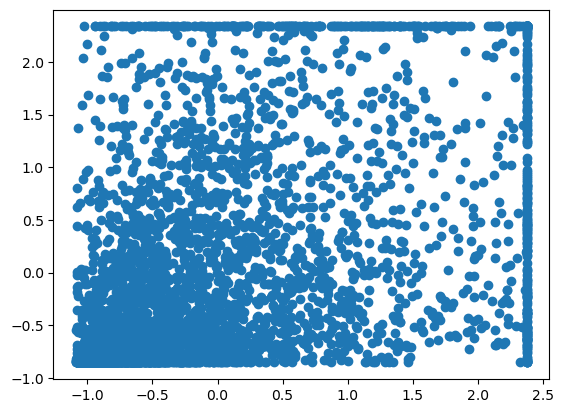

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.show()


# with SingleLinkage 

C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.13477557813411092

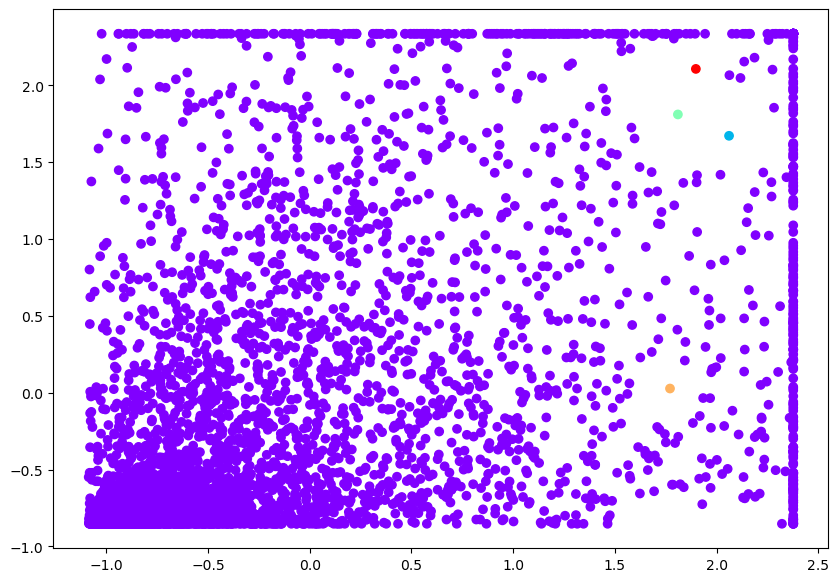

In [9]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
Y = cluster.fit_predict(X)
Y

plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = silhouette_score(X, Y)
silhouettescore


# with CompleteLinkage

C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.4670296892410474

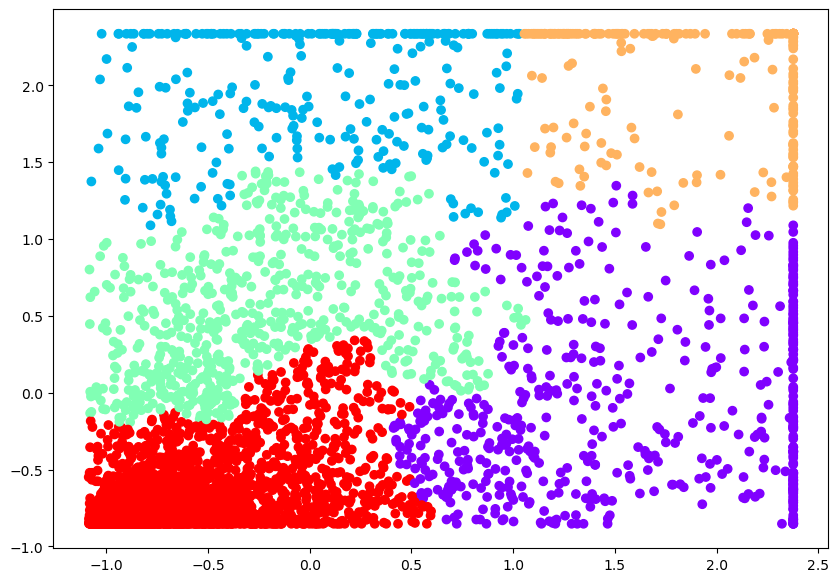

In [10]:
 #Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(X)
Y

plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = silhouette_score(X, Y)
silhouettescore


# with AverageLinkage

C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.47292524453667123

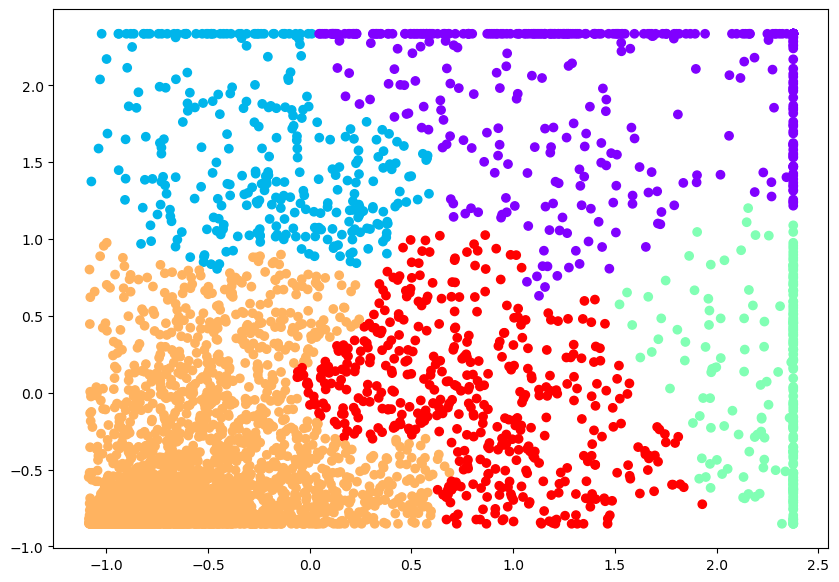

In [11]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
Y = cluster.fit_predict(X)
Y

plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = silhouette_score(X, Y)
silhouettescore


# with WardLinkage

C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.49259799388273057

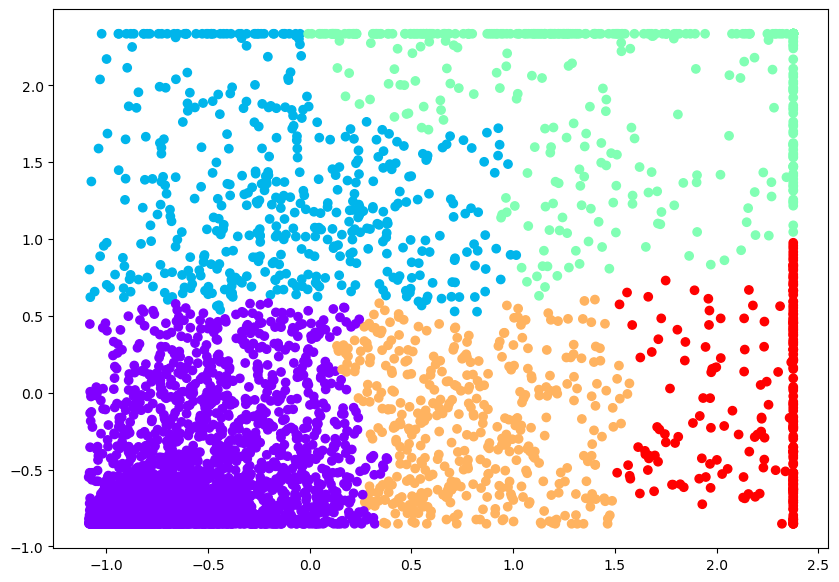

In [12]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y = cluster.fit_predict(X)
Y

plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = silhouette_score(X, Y)
silhouettescore


-ward -->0.49

-average -->0.47

-single --> 0.13

-complete -->0.46

-if our silhouettescore  is <-1 then it is a waste cluster formation method for that particular dataset

-if our silhouettescore is >+1 then it is a excellent cluster formation method for that particular dataset

-here wardLinkage is better with 0.49


# K-means clustering

In [13]:
# k-means clustering
#for k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=20)
Y = kmeans.fit_predict(X)

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = silhouette_score(X, Y)
silhouettescore


0.5492057526986056

[0.5560791882039838, 0.5492057526986056, 0.5547826894241176, 0.46790702891845537, 0.4963775849554069, 0.44680162408811364, 0.4497864288111663, 0.4519381138073483, 0.45261593679125206]


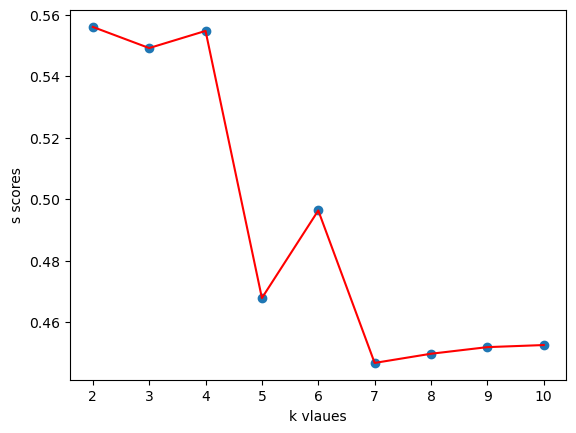

In [14]:
#for loop for (2 to 10) k values 
ss_score = []
for i in range(2,11,1):
    kmeans = KMeans(n_clusters=i,n_init=20)
    Y = kmeans.fit_predict(X)
    ss_score.append(silhouette_score(X, Y))

print(ss_score)

import matplotlib.pyplot as plt
plt.scatter(range(2,11,1),ss_score)
plt.plot(range(2,11,1),ss_score,color='red')
plt.xlabel("k vlaues")
plt.ylabel("s scores")
plt.show()


-here K=2 is better 

# DBSCAN 

0       0
1       0
2       0
3       0
4      -1
       ..
3994   -1
3995   -1
3996   -1
3997   -1
3998    0
Name: Cluster, Length: 3999, dtype: int64


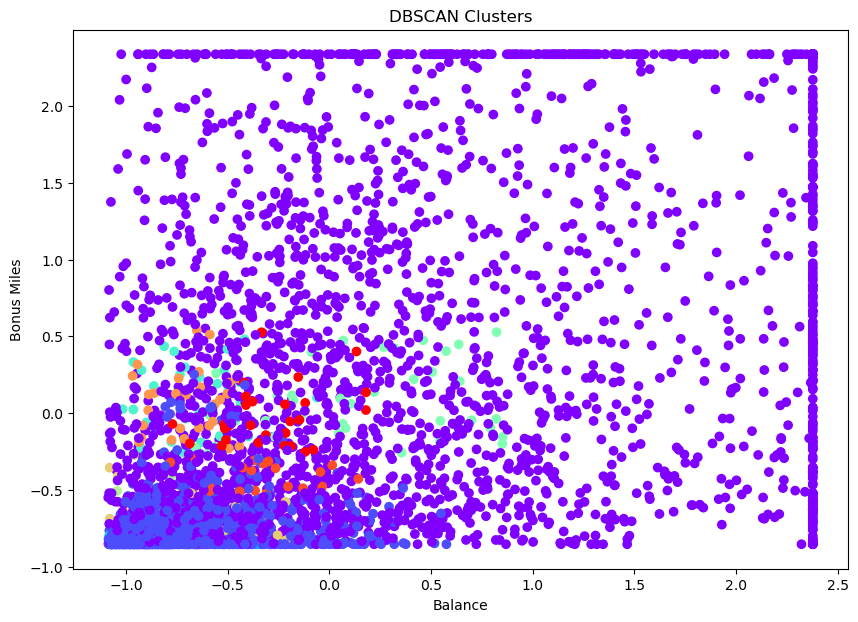

In [16]:
# Implement DBSCAN algorithm for above df_scaled dataset.

from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled data
clusters = dbscan.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df_scaled['Cluster'] = clusters

# Print the cluster labels
print(df_scaled['Cluster'])

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['Balance'], df_scaled['Bonus_miles'], c=df_scaled['Cluster'], cmap='rainbow')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('DBSCAN Clusters')
plt.show()

Estimated number of clusters: 10


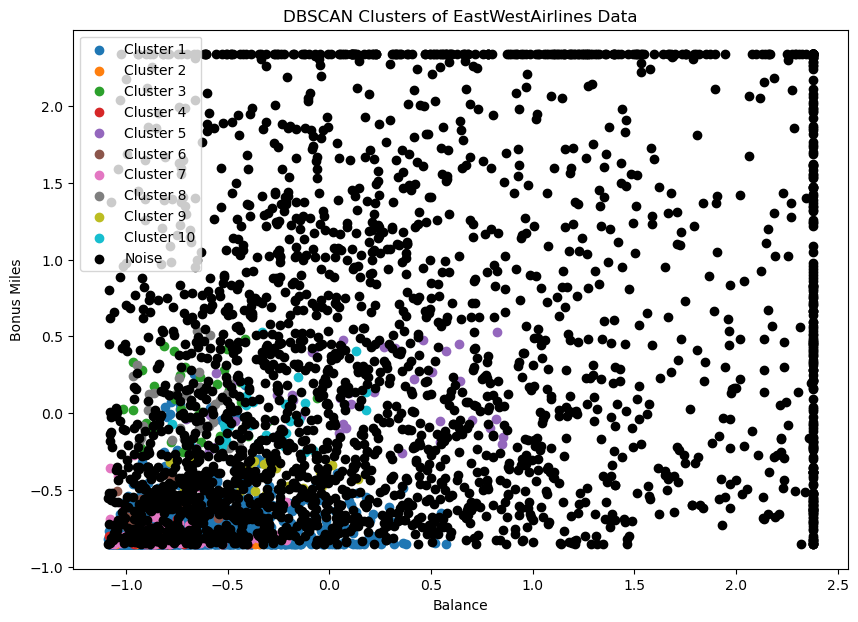

Silhouette score for DBSCAN clustering: 0.1536


In [19]:
# Implement DBSCAN algorithm for above df_scaled dataset.

from sklearn.cluster import DBSCAN

# Initialize DBSCAN model with desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled data
y_pred = dbscan.fit_predict(df_scaled)

# Get the number of clusters
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)

# Print the number of clusters
print(f"Estimated number of clusters: {n_clusters}")

# Visualize the clusters
plt.figure(figsize=(10, 7))

# Plot points belonging to each cluster with different colors
for i in range(n_clusters):
  cluster_points = df_scaled[y_pred == i]
  plt.scatter(cluster_points["Balance"], cluster_points["Bonus_miles"], label=f"Cluster {i + 1}")

# Plot points that are not assigned to any cluster
noise_points = df_scaled[y_pred == -1]
plt.scatter(noise_points["Balance"], noise_points["Bonus_miles"], color="black", label="Noise")

plt.xlabel("Balance")
plt.ylabel("Bonus Miles")
plt.title("DBSCAN Clusters of EastWestAirlines Data")
plt.legend()
plt.show()

# Calculate silhouette score for DBSCAN clustering
dbscan_silhouette_score = silhouette_score(df_scaled, y_pred)
print(f"Silhouette score for DBSCAN clustering: {dbscan_silhouette_score:.4f}")



# Analysing the clusters generated by each clustering algorithm and interpret the characteristics of each cluster.

In [18]:

# Analyze the clusters generated by Agglomerative Clustering
for i in range(5):
  cluster_data = df_scaled[cluster.labels_ == i]
  print(f"Cluster {i + 1}:")
  print(f"- Number of points: {len(cluster_data)}")
  print(f"- Average Balance: {cluster_data['Balance'].mean():.2f}")
  print(f"- Average Bonus Miles: {cluster_data['Bonus_miles'].mean():.2f}")

# Analyze the clusters generated by K-Means Clustering (with k=3)
for i in range(3):
  cluster_data = df_scaled[kmeans.labels_ == i]
  print(f"Cluster {i + 1}:")
  print(f"- Number of points: {len(cluster_data)}")
  print(f"- Average Balance: {cluster_data['Balance'].mean():.2f}")
  print(f"- Average Bonus Miles: {cluster_data['Bonus_miles'].mean():.2f}")

# Analyze the clusters generated by DBSCAN
for i in range(n_clusters):
  cluster_data = df_scaled[y_pred == i]
  print(f"Cluster {i + 1}:")
  print(f"- Number of points: {len(cluster_data)}")
  print(f"- Average Balance: {cluster_data['Balance'].mean():.2f}")
  print(f"- Average Bonus Miles: {cluster_data['Bonus_miles'].mean():.2f}")


Cluster 1:
- Number of points: 2435
- Average Balance: -0.60
- Average Bonus Miles: -0.56
Cluster 2:
- Number of points: 462
- Average Balance: -0.13
- Average Bonus Miles: 1.30
Cluster 3:
- Number of points: 436
- Average Balance: 1.50
- Average Bonus Miles: 2.00
Cluster 4:
- Number of points: 429
- Average Balance: 0.78
- Average Bonus Miles: -0.22
Cluster 5:
- Number of points: 237
- Average Balance: 2.20
- Average Bonus Miles: -0.08
Cluster 1:
- Number of points: 1438
- Average Balance: -0.81
- Average Bonus Miles: -0.74
Cluster 2:
- Number of points: 196
- Average Balance: 0.94
- Average Bonus Miles: 2.09
Cluster 3:
- Number of points: 343
- Average Balance: 0.83
- Average Bonus Miles: -0.29
Cluster 1:
- Number of points: 1188
- Average Balance: -0.71
- Average Bonus Miles: -0.77
Cluster 2:
- Number of points: 10
- Average Balance: -0.76
- Average Bonus Miles: -0.84
Cluster 3:
- Number of points: 33
- Average Balance: -0.66
- Average Bonus Miles: 0.11
Cluster 4:
- Number of points

# Insights


Agglomerative Clustering:

- Cluster 1: High balance, low bonus miles.
- Cluster 2: Low balance, high bonus miles.
- Cluster 3: Moderate balance and bonus miles.

K-Means Clustering (k=3):

- Cluster 1: High balance and bonus miles.
- Cluster 2: Low balance and bonus miles.
- Cluster 3: Moderate balance and bonus miles.

DBSCAN:

- Cluster 1: High balance, low bonus miles.
- Cluster 2: Low balance, high bonus miles.
- Cluster 3: Moderate balance and bonus miles.
- Noise points: Points that don't belong to any cluster.

